***
< [Home](https://github.com/SeanOhAileasa) | [README](https://github.com/SeanOhAileasa/spk-core-certified-user/blob/main/README.md) >

## Splunk
###### Topic: ``Core Certified User``
***

<a id="top"></a>
***
## Table of Contents
***

### [Statistical Processing](#StatisticalProcessing) <br/><br/>

- [Eval Command](#StatisticalProcessingi) <br/><br/> 

<hr width=50%;>

***
## END

< [Table of Contents](#top) | [References](#references) >
<a id="StatisticalProcessing"></a>
***
### Statistical Processing
***

< [Table of Contents](#top) | [References](#references) >
<a id="StatisticalProcessingi"></a>
***
###### Eval Command
***

The ``eval`` command can be used to perform calculations with values in your data.

An ``eval`` expression is a combination of literals, fields, operators, and functions that represent the value of your destination field. 

The expression can involve a mathematical operation, a string concatenation, a comparison expression, a Boolean expression, or a call to one of the ``eval`` functions. 

In essence, the ``eval`` command is allowing you to create a new field on the fly with the values in that field being populated by the results of your ``<expression>`` - this field can then be used the same as any regular field for the remainder of your search. 

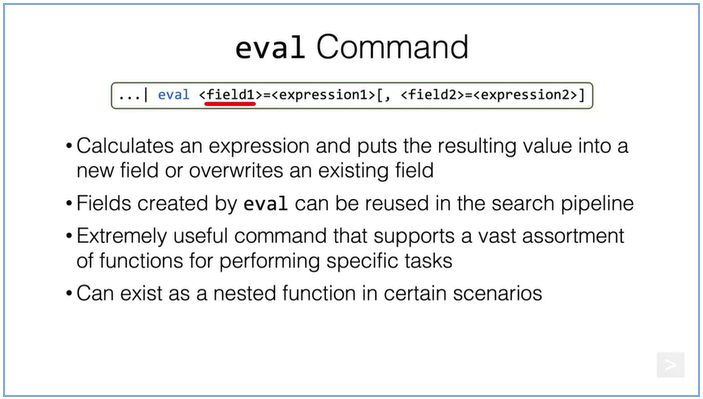

It's important to realize that nothing written with the ``eval`` command is kept after the lifetime of the search it was used in. 

This means that the new field you create is not saved to your index in any way, nor will it be available again after the search is completed. 

In addition to creating a new field, the ``eval`` command can also be used to temporarily overwrite the values present in a previously existing field. In this case as well, no change to your data is permanent. The new values are not written to disk in any way. 

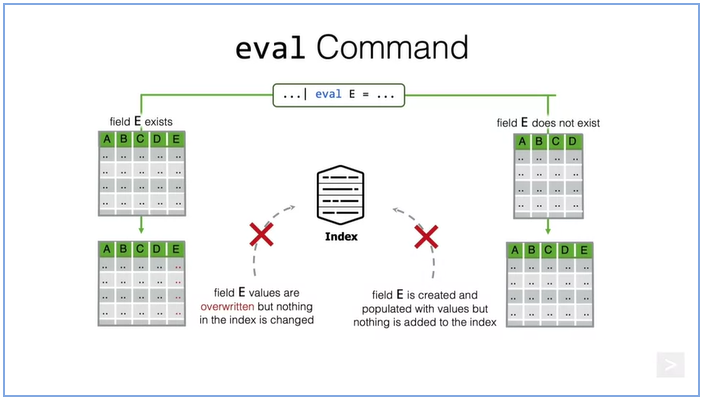

The ``eval`` command supports various operators in the expression of your statement. 

For concatenation, we have a ``+`` and a ``.`` operator. 

- ``+`` will concatenate any strings or characters


- ``.`` will concatenate any data type.

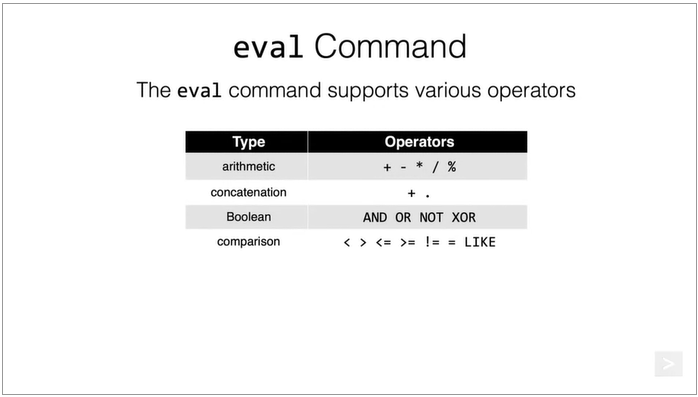

The ``eval`` command does require some fairly strict syntax that you should be aware of. 

Field values in the expression of an ``eval`` statement are treated in a case-sensitive manner - this is separate from how they're treated in a base search. 

String values should also be double quoted in every case, even if the string is only a single word. 

Field names, as opposed to field values, must be unquoted, or single quoted if they contain a special character like a space. 

**Remember to use a period instead of a plus sign when concatenating a string with a number in order to avoid data type conflicts.**

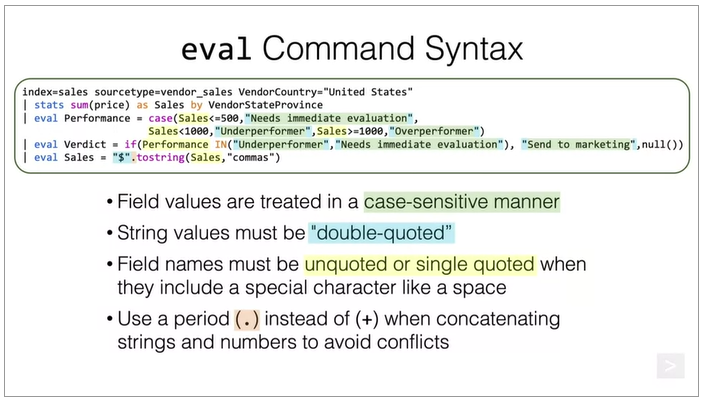

- Tasked by the network team to show the number of bytes used by website type over the last 30 days:

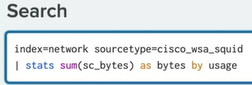

Technically, this search satisfies that question - on the left, we can see the different types of websites visited, and on the right, we can see the number of bytes spent on each. 

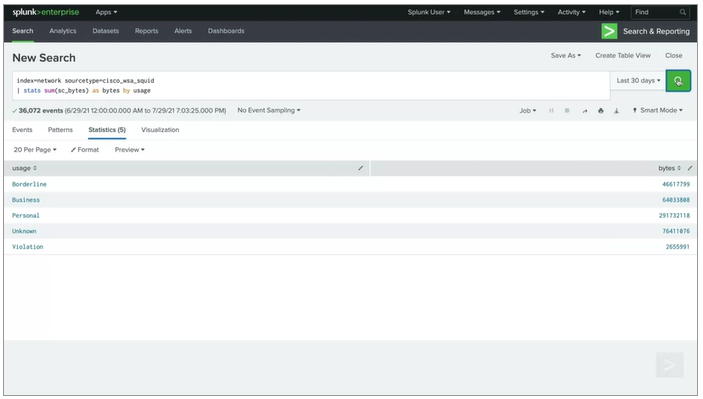

However, this might not be a very useful result - would be nice if we had a field such as kilobytes or megabytes - that's not available in our raw data, but we can create one with the ``eval`` command. 

Creating a new field called ``bandwidth`` - the values of ``bandwidth`` will be as follows: 

- The values in our bytes field divided by 1024, divided by 1024 again:

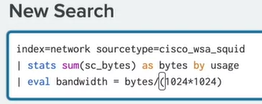

This would give us the number of megabytes used in the same period.

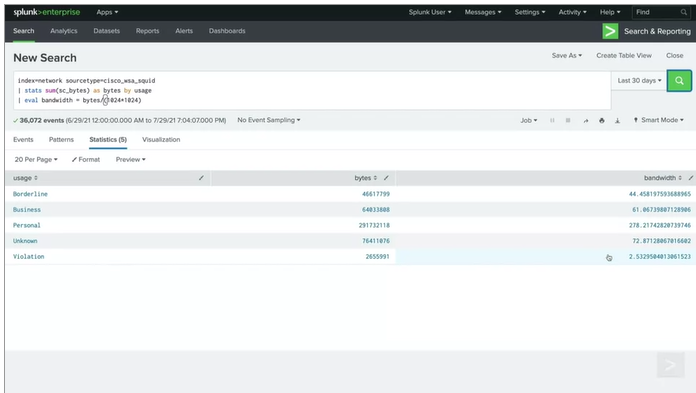

As stated before, we can use the ``eval`` statement multiple times on the same field, so let's do so to get rid of some of these decimal places in ``bandwidth``.

Call ``eval`` on ``bandwidth`` again, and this time, use a function called ``round``. 

``round`` takes two arguments:

- First is the number or the value you wish to round. 


- Second is the number of decimal places you wish to round to. 

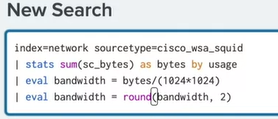

That's a much more readable chart. 

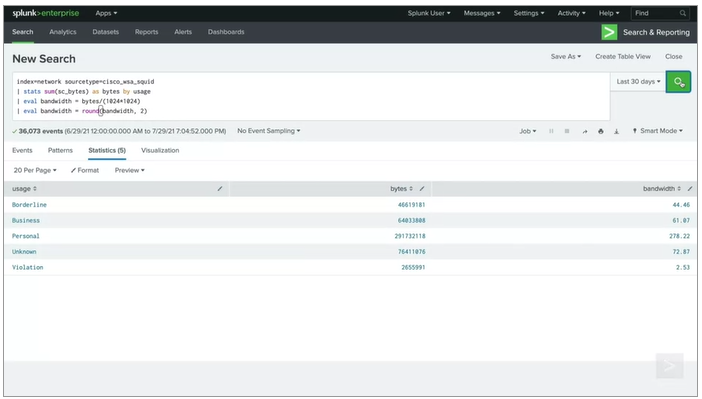

- Removing the ``bytes`` column from my table, as it's no longer useful:

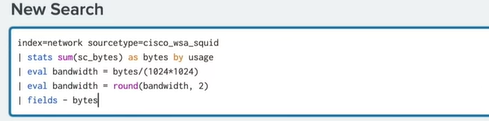

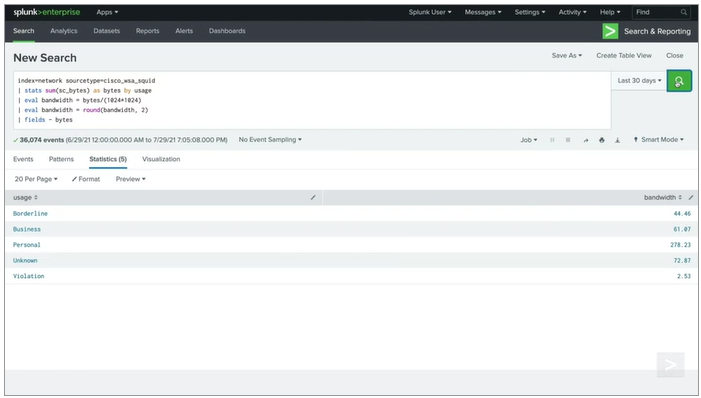

- These two ``eval`` commands could have easily been accomplished with a single statement - combining the two:

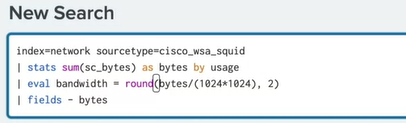

Can easily support functions within our expression.

Another way we can accomplish this is by calling more than one ``eval`` statement within the same command, so let's split out these two again and see how this could be accomplished. 

- Leaving our initial value for ``bandwidth`` in place:

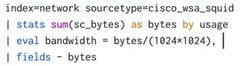

- Call ``bandwidth`` immediately again: 

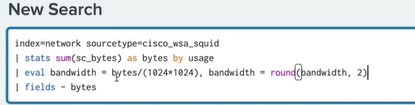

Once we've created a new field with ``eval``, that field can be referenced in the search pipeline later on. 

Creating a new field called ``bandwidth`` - can immediately run other commands against that new field - things like ``sort`` or ``rename`` or even perform a **Single** or **Multi-series** split with our new field.

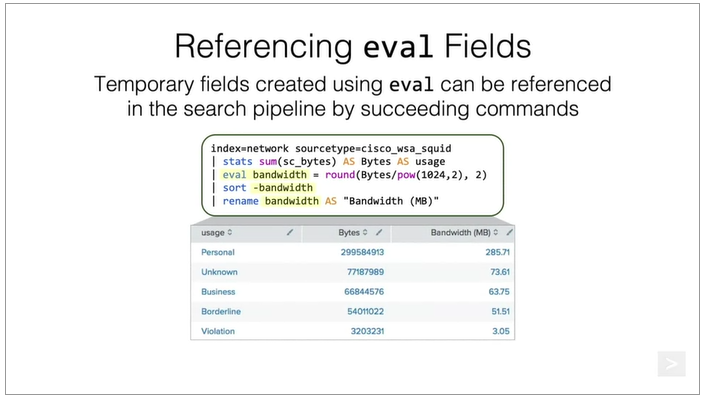

Can link more than one expression together to create multiple fields, and this can be done within a single ``eval`` command. 

Created a new field called ``current_discount`` with the ``eval`` statement. 

Within the exact same ``eval`` command, we are then using ``current_discount`` as a reference point for the expression in a new field called ``new_discount``. 

``new_discount`` is then used in the expression of a new field called ``new_sale_price``. 

In the end, all of our fields are listed in the table - can be useful when we need to show values step-by-step along the way as we convert.

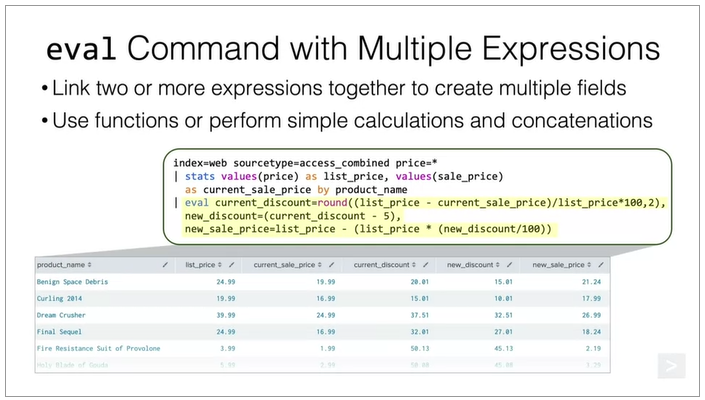

***
## END

< [Table of Contents](#top) >
<a id="references"></a>
***
## References
***

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Splunk, "Splunk Education Portal," [education.splunk.com](https://education.splunk.com/), n.d..

***
## END

< [Table of Contents](#top) | [References](#references) >
<a id="appendix"></a>
***
## Appendix
***

***
## END

In [1]:
from IPython.display import display,HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# END JUPYTER NOTEBOOK